# Setting up functions and environment for DeSeq2

23-12-2023


Using code snippets from https://github.com/mousepixels/sanbomics_scripts/blob/main

In [2]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [3]:
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 200)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)

In [4]:
file_path = "/home/t.afanasyeva/MATseq/notebooks/gene_counts_7128_61_training.csv"
counts = pd.read_csv(file_path, index_col="sample")

In [5]:
counts = counts[(counts["class"] == "LPS") | (counts["class"] == "IMDM")]

In [6]:
metadata = counts["class"]
metadata = metadata.to_frame(name="Condition")

In [7]:
metadata

,Condition
sample,
BA028_IMDM_01,IMDM
BA028_IMDM_02,IMDM
BA028_LPS_05,LPS
BA028_LPS_06,LPS
BA028_LPS_07,LPS
BA029_IMDM_02,IMDM
BA029_LPS_05,LPS
BA029_LPS_06,LPS
BA029_LPS_08,LPS


In [8]:
counts = counts.drop("class", axis=1)

In [9]:
counts = counts.T[counts.T.mean(axis=1) > 10].T

In [10]:
dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="Condition")

In [11]:
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Fitting dispersions...
... done in 1.22 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 1.32 seconds.

Fitting LFCs...
... done in 1.26 seconds.

Refitting 0 outliers.



In [12]:
dds

AnnData object with n_obs × n_vars = 29 × 11966
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [13]:
stat_res = DeseqStats(dds, contrast=("Condition", "LPS", "IMDM"))

In [14]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition LPS vs IMDM
          baseMean  log2FoldChange    lfcSE     stat       pvalue         padj
KLHL8    124.02246         0.25496  0.06968  3.65914  2.53064e-04  2.19114e-03
ZNF576    53.75334        -0.10847  0.09384 -1.15590  2.47720e-01  5.04634e-01
FCF1     290.85518         0.03675  0.07092  0.51812  6.04373e-01  8.09575e-01
TAF12     95.44678        -0.01778  0.08368 -0.21250  8.31717e-01  9.30981e-01
GLRX      97.98360         0.53792  0.08607  6.24972  4.11193e-10  8.73950e-09
...            ...             ...      ...      ...          ...          ...
TSN      416.99301        -0.04891  0.05497 -0.88969  3.73634e-01  6.36157e-01
NFATC1   487.65582         0.02110  0.04867  0.43348  6.64668e-01  8.44922e-01
PORCN     34.41342         0.03543  0.11087  0.31957  7.49294e-01  8.92500e-01
REL     2889.47446         0.16972  0.06617  2.56492  1.03200e-02  5.30053e-02
RPL23   3564.88580         0.03806  0.09447  0.40291  6.87018e-01  8.59

... done in 1.15 seconds.



In [15]:
res = stat_res.results_df

In [16]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
KLHL8,124.02246,0.25496,0.06968,3.65914,2.53064e-04,2.19114e-03
ZNF576,53.75334,-0.10847,0.09384,-1.15590,2.47720e-01,5.04634e-01
FCF1,290.85518,0.03675,0.07092,0.51812,6.04373e-01,8.09575e-01
TAF12,95.44678,-0.01778,0.08368,-0.21250,8.31717e-01,9.30981e-01
GLRX,97.98360,0.53792,0.08607,6.24972,4.11193e-10,8.73950e-09
...,...,...,...,...,...,...
TSN,416.99301,-0.04891,0.05497,-0.88969,3.73634e-01,6.36157e-01
NFATC1,487.65582,0.02110,0.04867,0.43348,6.64668e-01,8.44922e-01
PORCN,34.41342,0.03543,0.11087,0.31957,7.49294e-01,8.92500e-01
REL,2889.47446,0.16972,0.06617,2.56492,1.03200e-02,5.30053e-02


In [17]:
res = res[res.baseMean >= 10]

In [18]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
KLHL8,124.02246,0.25496,0.06968,3.65914,2.53064e-04,2.19114e-03
ZNF576,53.75334,-0.10847,0.09384,-1.15590,2.47720e-01,5.04634e-01
FCF1,290.85518,0.03675,0.07092,0.51812,6.04373e-01,8.09575e-01
TAF12,95.44678,-0.01778,0.08368,-0.21250,8.31717e-01,9.30981e-01
GLRX,97.98360,0.53792,0.08607,6.24972,4.11193e-10,8.73950e-09
...,...,...,...,...,...,...
TSN,416.99301,-0.04891,0.05497,-0.88969,3.73634e-01,6.36157e-01
NFATC1,487.65582,0.02110,0.04867,0.43348,6.64668e-01,8.44922e-01
PORCN,34.41342,0.03543,0.11087,0.31957,7.49294e-01,8.92500e-01
REL,2889.47446,0.16972,0.06617,2.56492,1.03200e-02,5.30053e-02


In [19]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [20]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GLRX,97.98360,0.53792,0.08607,6.24972,4.11193e-10,8.73950e-09
PPARG,178.73459,-0.83677,0.10383,-8.05917,7.68121e-16,2.67190e-14
OLIG2,30.21056,0.77373,0.13949,5.54676,2.91009e-08,5.05401e-07
PECAM1,900.18728,-1.24377,0.07705,-16.14227,1.28715e-58,2.70211e-56
P2RY1,85.32475,-0.63020,0.08405,-7.49826,6.46702e-14,1.90134e-12
...,...,...,...,...,...,...
ARHGAP18,174.28189,-0.77551,0.06701,-11.57343,5.61875e-31,5.05519e-29
GSAP,285.00430,0.59434,0.06584,9.02771,1.75300e-19,7.97581e-18
SLC25A34,25.57704,0.55173,0.15534,3.55182,3.82579e-04,3.15938e-03
PMP22,60.86110,-1.02470,0.14429,-7.10174,1.23192e-12,3.35026e-11


In [21]:
# PCA
import scanpy as sc

In [22]:
sc.tl.pca(dds)

/home/t.afanasyeva/mambaforge/envs/pydeseq2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


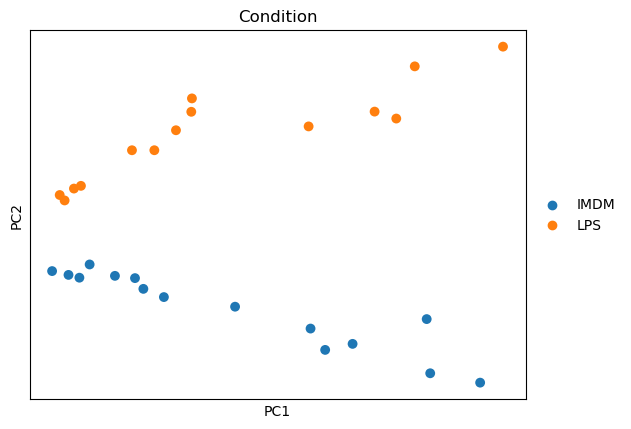

In [23]:
sc.pl.pca(dds, color="Condition", size=200)

GSEA

In [24]:
import gseapy as gp

In [25]:
gp.__version__

'1.0.6'

In [26]:
ranking = res[["stat"]].dropna().sort_values("stat", ascending=False)

In [27]:
pre_res = gp.prerank(
    rnk=ranking,
    gene_sets=["GO_Biological_Process_2021"],
    seed=6,
    permutation_num=100,
)

In [28]:
out = []

for term in list(pre_res.results):
    out.append(
        [
            term,
            pre_res.results[term]["fdr"],
            pre_res.results[term]["es"],
            pre_res.results[term]["nes"],
        ]
    )

out_df = (
    pd.DataFrame(out, columns=["Term", "fdr", "es", "nes"])
    .sort_values("fdr")
    .reset_index(drop=True)
)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__cellular response ...,0.0,0.61860,2.22767
1,GO_Biological_Process_2021__cellular response ...,0.0,0.54096,2.14949
2,GO_Biological_Process_2021__cellular response ...,0.0,0.76013,2.16081
3,GO_Biological_Process_2021__cellular response ...,0.0,0.68865,2.24962
4,GO_Biological_Process_2021__response to lipopo...,0.0,0.64343,2.25677
...,...,...,...,...
2150,GO_Biological_Process_2021__protein localizati...,1.0,-0.21922,-0.56038
2151,GO_Biological_Process_2021__mitotic spindle as...,1.0,-0.23643,-0.61390
2152,GO_Biological_Process_2021__regulation of DNA-...,1.0,-0.16714,-0.47714
2153,GO_Biological_Process_2021__positive regulatio...,1.0,-0.17005,-0.45938


In [29]:
list(out_df.sort_values("fdr").iloc[:10].Term)

['GO_Biological_Process_2021__cellular response to interleukin-1 (GO:0071347)',
 'GO_Biological_Process_2021__cellular response to lipid (GO:0071396)',
 'GO_Biological_Process_2021__antimicrobial humoral immune response mediated by antimicrobial peptide (GO:0061844)',
 'GO_Biological_Process_2021__cytokine-mediated signaling pathway (GO:0019221)',
 'GO_Biological_Process_2021__response to lipopolysaccharide (GO:0032496)',
 'GO_Biological_Process_2021__cellular response to lipopolysaccharide (GO:0071222)',
 'GO_Biological_Process_2021__cellular response to chemokine (GO:1990869)',
 'GO_Biological_Process_2021__cellular response to cytokine stimulus (GO:0071345)',
 'GO_Biological_Process_2021__cellular response to molecule of bacterial origin (GO:0071219)',
 'GO_Biological_Process_2021__response to interleukin-1 (GO:0070555)']

In [30]:
out_df.sort_values("fdr").iloc[0].Term

'GO_Biological_Process_2021__cellular response to interleukin-1 (GO:0071347)'

[<Axes: xlabel='Gene Rank'>, <Axes: ylabel='Enrichment Score'>]

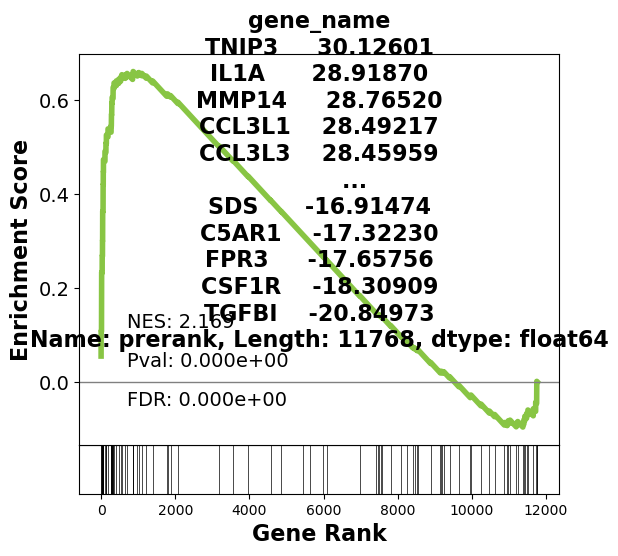

In [31]:
from gseapy.plot import gseaplot

gseaplot(
    pre_res.ranking,
    **pre_res.results[
        "GO_Biological_Process_2021__cellular response to molecule of bacterial origin (GO:0071219)"
    ]
)

In [32]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2021__response to interl...,0.74234,2.3439,0.0,0.0,0.0,21/56,7.40%,CCL3L1;CCL3;CCL4;IL1B;CCL20;IRAK2;CXCL8;ZC3H12...
1,prerank,GO_Biological_Process_2021__response to lipopo...,0.64343,2.25677,0.0,0.0,0.0,41/121,7.36%,TNIP3;IL1A;CXCL2;IL1B;IL6;PELI1;CXCL3;CXCL8;ZC...
2,prerank,GO_Biological_Process_2021__cellular response ...,0.68865,2.24962,0.0,0.0,0.0,40/99,7.36%,TNIP3;IL1A;CCL3;CXCL2;IL1B;IL6;CXCL3;TNF;CXCL8...
3,prerank,GO_Biological_Process_2021__cellular response ...,0.6186,2.22767,0.0,0.0,0.0,46/145,8.66%,TNIP3;IL1A;CXCL2;IL1B;IL6;CXCL3;CXCL8;ZC3H12A;...
4,prerank,GO_Biological_Process_2021__cytokine-mediated ...,0.55487,2.19871,0.0,0.0,0.0,157/478,10.85%,IL1A;CCL3L1;CCL3;PTGS2;CCL4;CXCL2;TRAF1;IL1B;I...


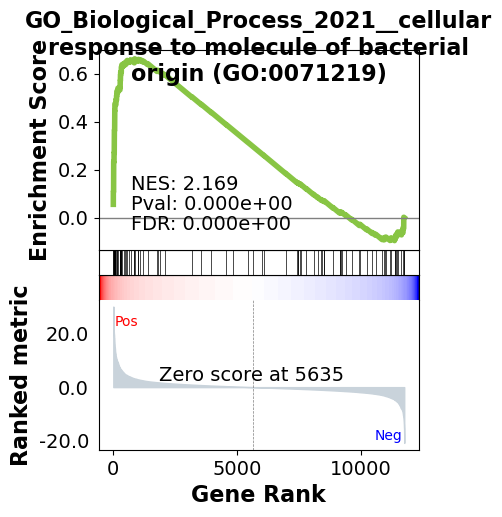

In [33]:
## easy way
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[5])  # v1.0.5

In [35]:
for term in range(5):
    gseaplot(
        rank_metric=pre_res.ranking,
        term=terms[term],
        ofname=f"{terms[term]}.pdf",
        **pre_res.results[terms[term]],
    )

Historgram 

In [36]:
import numpy as np
import seaborn as sns

In [37]:
dds.layers["normed_counts"]

array([[  94.88631003,   46.38886268,  432.25985678, ...,   37.95452401,
        2494.45566133, 4229.82084246],
       [  91.66335066,   59.45730853,  272.51266411, ...,   14.86432713,
        2816.78999177, 4927.52444471],
       [ 133.31548028,   48.47835646,  317.53323484, ...,   24.23917823,
        2423.91782321, 3822.51840721],
       ...,
       [ 135.42846158,   58.19616622,  265.41802913, ...,   32.63336424,
        2975.07503963, 3278.02143763],
       [ 161.13293339,   54.17400347,  309.301148  , ...,   41.67231036,
        2705.92201934, 4007.48717956],
       [ 133.43472927,   61.22299343,  271.57891958, ...,   36.62914137,
        2919.86584052, 3336.91477867]])

In [38]:
dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])
dds.layers["log1p"]

array([[4.56316322, 3.85838724, 6.07133768, ..., 3.66239491, 7.82222662,
        8.35015131],
       [4.52897304, 4.10193747, 5.61134792, ..., 2.76407301, 7.94370817,
        8.50279492],
       [4.90019136, 3.90153533, 5.76372682, ..., 3.22839748, 7.79355292,
        8.24892633],
       ...,
       [4.91580039, 4.08085678, 5.58506661, ..., 3.51551856, 7.99836061,
        8.09530031],
       [5.08841658, 4.01049189, 5.73754327, ..., 3.75355024, 7.90356748,
        8.29616919],
       [4.9010788 , 4.1307246 , 5.60792819, ..., 3.62777879, 7.97963537,
        8.11310157]])

In [39]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 29 × 651
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [40]:
grapher = pd.DataFrame(
    dds_sigs.layers["log1p"].T, index=dds_sigs.var_names, columns=dds_sigs.obs_names
)

/home/t.afanasyeva/mambaforge/envs/pydeseq2/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/t.afanasyeva/mambaforge/envs/pydeseq2/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


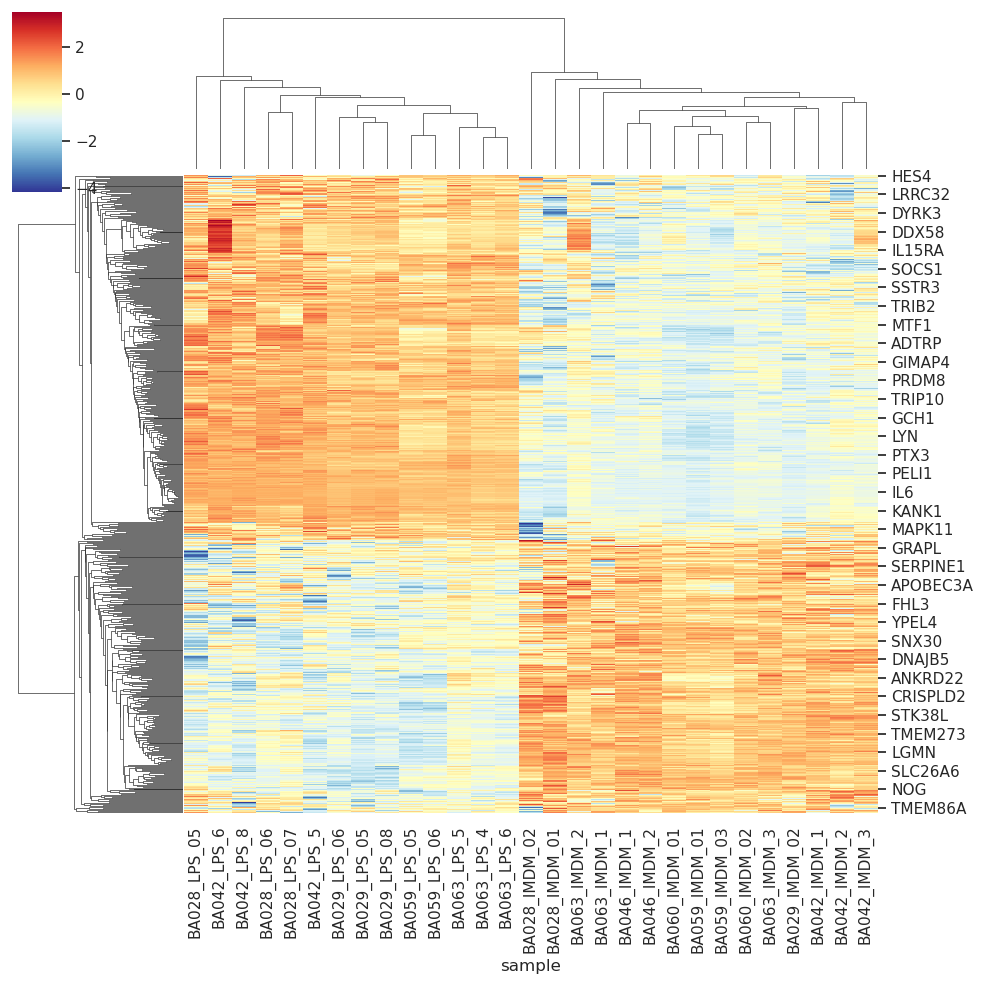

In [41]:
sns.set_theme(
    context="notebook",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None,
)
sns.clustermap(grapher, z_score=0, cmap="RdYlBu_r")

Plotting histogram for top 50 significant genes with lowest padj

In [42]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GLRX,97.98360,0.53792,0.08607,6.24972,4.11193e-10,8.73950e-09
PPARG,178.73459,-0.83677,0.10383,-8.05917,7.68121e-16,2.67190e-14
OLIG2,30.21056,0.77373,0.13949,5.54676,2.91009e-08,5.05401e-07
PECAM1,900.18728,-1.24377,0.07705,-16.14227,1.28715e-58,2.70211e-56
P2RY1,85.32475,-0.63020,0.08405,-7.49826,6.46702e-14,1.90134e-12
...,...,...,...,...,...,...
ARHGAP18,174.28189,-0.77551,0.06701,-11.57343,5.61875e-31,5.05519e-29
GSAP,285.00430,0.59434,0.06584,9.02771,1.75300e-19,7.97581e-18
SLC25A34,25.57704,0.55173,0.15534,3.55182,3.82579e-04,3.15938e-03
PMP22,60.86110,-1.02470,0.14429,-7.10174,1.23192e-12,3.35026e-11


In [43]:
sigs_sub = sigs.sort_values("padj")[:50]

In [44]:
dds_sigs_sub = dds[:, sigs_sub.index]
dds_sigs_sub

View of AnnData object with n_obs × n_vars = 29 × 50
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [45]:
grapher_sub = pd.DataFrame(
    dds_sigs_sub.layers["log1p"].T,
    index=dds_sigs_sub.var_names,
    columns=dds_sigs_sub.obs_names,
)

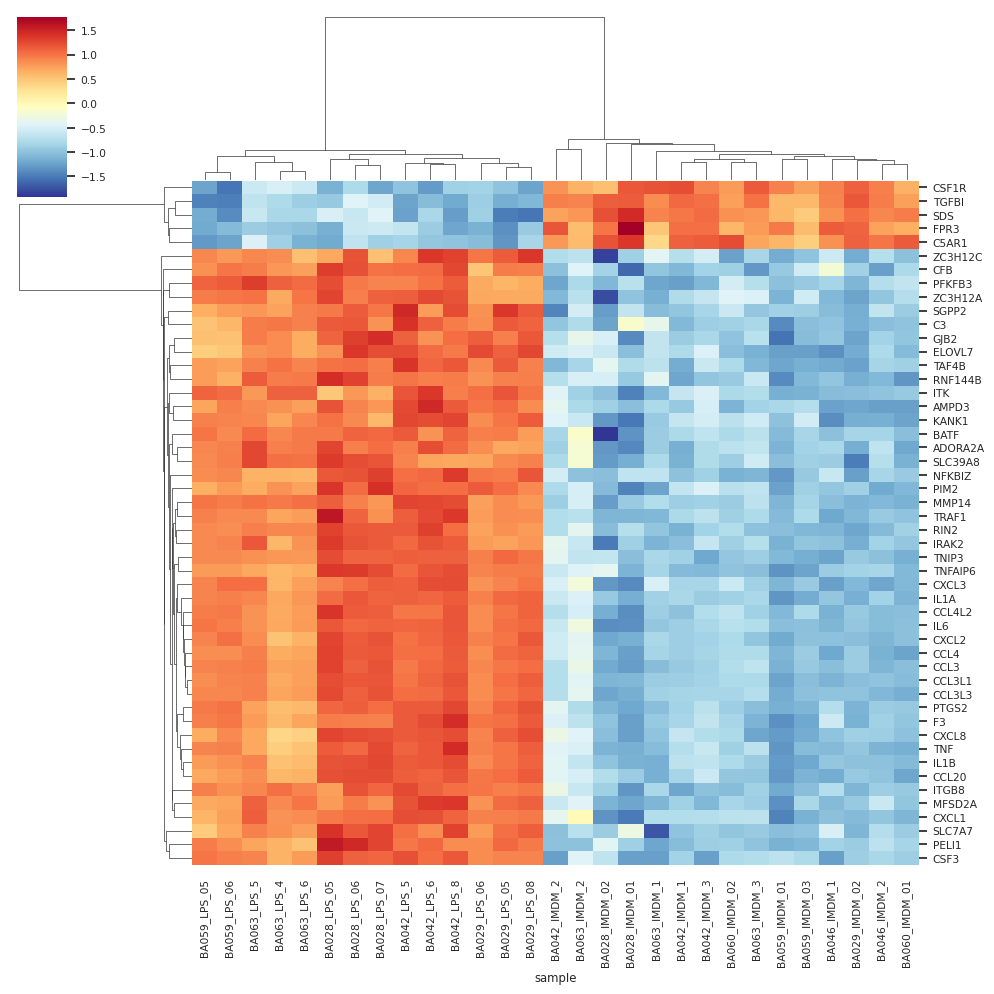

In [46]:
sns.set_theme(
    context="notebook",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=0.7,
    color_codes=True,
    rc=None,
)
fig = sns.clustermap(grapher_sub, z_score=0, cmap="RdYlBu_r")

fig.savefig("LPSvsIMDMtop50.png")

Plotting histogram for genes involved in TLR1 activation, NOD activation and interleukines

In [47]:
path = "/home/t.afanasyeva/MATseq/notebooks/DeSeq2/immuno_gene_symbols.txt"
immunoresponse_gene_df = pd.read_csv(path, sep="\t")

In [48]:
immunoresponse_genes = immunoresponse_gene_df["Approved symbol"]

In [86]:
immunoresponse_genes

['IL17RD',
 'IL18R1',
 'IL18RAP',
 'IL1R1',
 'IL1RAP',
 'IL1RAPL1',
 'IL1RAPL2',
 'IL1RL1',
 'IL1RL2',
 'MYD88',
 'SARM1',
 'SIGIRR',
 'TICAM1',
 'TICAM2',
 'TIRAP',
 'TLR1',
 'TLR10',
 'TLR2',
 'TLR3',
 'TLR4',
 'TLR5',
 'TLR6',
 'TLR7',
 'TLR8',
 'TLR9',
 'IL1A',
 'IL1B',
 'IL1F10',
 'IL1RN',
 'IL2',
 'IL3',
 'IL4',
 'IL5',
 'IL6',
 'IL7',
 'CXCL8',
 'IL9',
 'IL10',
 'IL11',
 'IL12A',
 'IL12B',
 'IL13',
 'IL15',
 'IL16',
 'IL17A',
 'IL17B',
 'IL17C',
 'IL17D',
 'IL17F',
 'IL18',
 'IL19',
 'IL20',
 'IL21',
 'IL22',
 'IL23A',
 'IL24',
 'IL25',
 'IL26',
 'IL27',
 'IL31',
 'IL32',
 'IL33',
 'IL34',
 'IL36A',
 'IL36B',
 'IL36G',
 'IL36RN',
 'IL37',
 'NOD1',
 'NOD2']

In [49]:
sigs[sigs.index.isin(immunoresponse_genes)].index

Index(['IL6', 'IL1A', 'IL15', 'IL1RAP', 'TLR7', 'CXCL8', 'IL7', 'IL1RN',
       'IL36RN', 'TICAM2', 'IL10', 'IL1B', 'IL36G', 'TLR1', 'NOD2'],
      dtype='object')

In [50]:
dds_sub = dds[:, sigs[sigs.index.isin(immunoresponse_genes)].index]

In [51]:
dds_sub

View of AnnData object with n_obs × n_vars = 29 × 15
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [52]:
grapher = pd.DataFrame(
    dds_sub.layers["log1p"].T, index=dds_sub.var_names, columns=dds_sub.obs_names
)

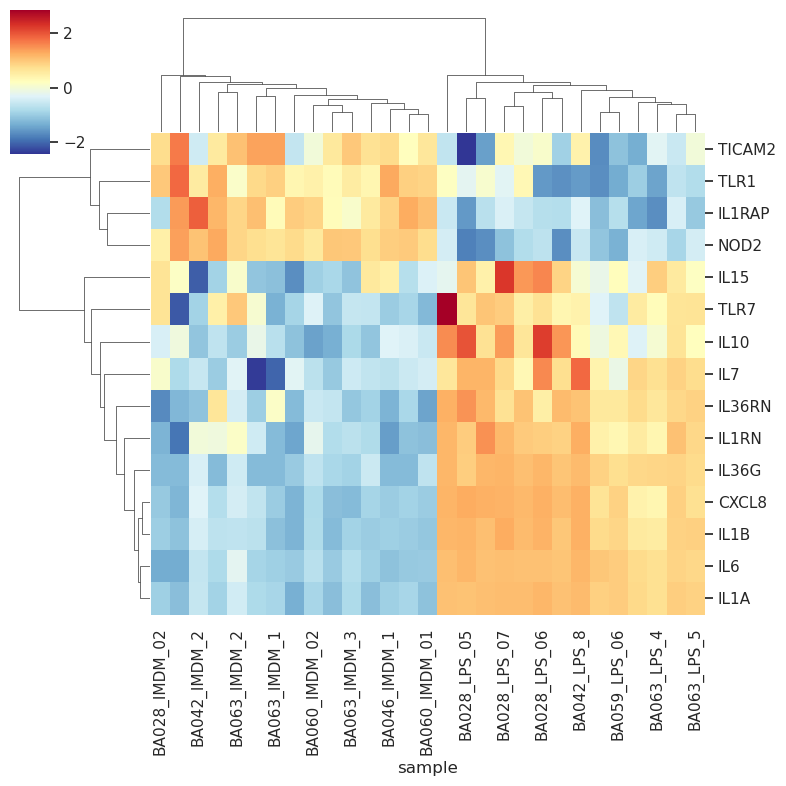

In [53]:
sns.set_theme(
    context="notebook",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None,
)
ax = sns.clustermap(grapher, z_score=0, cmap="RdYlBu_r", figsize=(8, 8))

All immuno genes, also non-significant


In [54]:
res[res.index.isin(immunoresponse_genes)].index

Index(['TLR2', 'TLR10', 'IL6', 'IL1RL2', 'IL1A', 'IL1R1', 'IL15', 'MYD88',
       'IL23A', 'IL24', 'IL1RAP', 'TLR6', 'TLR3', 'TIRAP', 'TLR7', 'CXCL8',
       'IL18', 'SIGIRR', 'IL7', 'TLR4', 'IL32', 'IL18R1', 'TLR9', 'IL1RN',
       'TLR8', 'IL18RAP', 'IL36RN', 'TICAM2', 'TICAM1', 'IL10', 'IL1B',
       'IL36G', 'NOD1', 'TLR5', 'IL16', 'SARM1', 'TLR1', 'NOD2'],
      dtype='object')

In [55]:
dds_sub_non_sig = dds[:, res[res.index.isin(immunoresponse_genes)].index]

In [56]:
grapher = pd.DataFrame(
    dds_sub_non_sig.layers["log1p"].T,
    index=dds_sub_non_sig.var_names,
    columns=dds_sub_non_sig.obs_names,
)

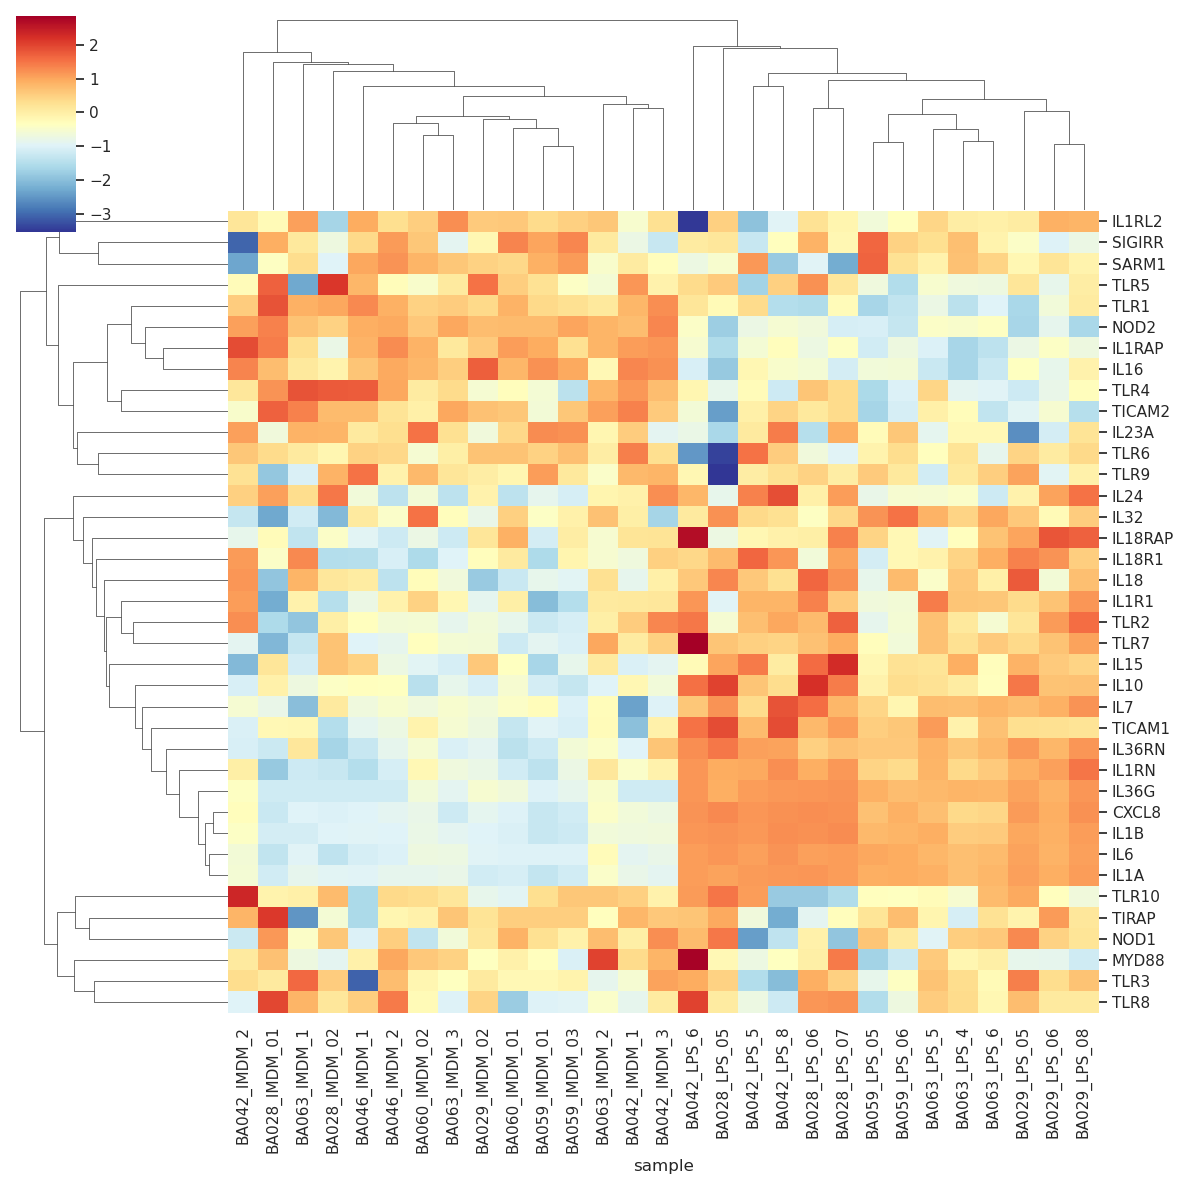

In [57]:
sns.set_theme(
    context="notebook",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None,
)
ax = sns.clustermap(grapher, z_score=0, cmap="RdYlBu_r", figsize=(12, 12))

Go term analysis

In [1]:
# !python /home/t.afanasyeva/mambaforge/envs/pydeseq2/bin/ncbi_gene_results_to_python.py -o genes_ncbi_homo_sapiens_proteincoding.py gene_result.txt

      20,634 lines READ:  gene_result.txt
      20,615 geneids WROTE: genes_ncbi_homo_sapiens_proteincoding.py


In [2]:
from genes_ncbi_homo_sapiens_proteincoding import GENEID2NT as GeneID2nt_hs

In [1]:
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

In [4]:
# # run one time to initialize
from goatools.base import gunzip

obo_fname = download_go_basic_obo()

  EXISTS: go-basic.obo


In [ ]:
# fin_gene2go = download_ncbi_associations()
fin_gene2go = gunzip("gene2go.gz")

fin_gene2go = "gene2go"

download_ncbi_associations returned critical conection error, likely was not handled well by Sanquin's proxy. I hav downloaded the nessesary gene2go data manually and unzipped

In [5]:
obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2023-11-15) 46,228 Terms


In [6]:
# run one time to initialize
mapper = {}

for key in GeneID2nt_hs:
    mapper[GeneID2nt_hs[key].Symbol] = GeneID2nt_hs[key].GeneID

inv_map = {v: k for k, v in mapper.items()}

In [7]:
# run one time to initialize

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[9606])
# Get namespace2association where:
#    namespace is:
#        BP: biological_process
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

NameError: name 'fin_gene2go' is not defined

In [65]:
# run one time to initialize
goeaobj = GOEnrichmentStudyNS(
    GeneID2nt_hs.keys(),  # List of human protein-coding genes
    ns2assoc,  # geneid/GO associations
    obodag,  # Ontologies
    propagate_counts=False,
    alpha=0.05,  # default significance cut-off
    methods=["fdr_bh"],
)  # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 82% 17,005 of 20,615 population items found in association

Load CC Ontology Enrichment Analysis ...
 88% 18,132 of 20,615 population items found in association

Load MF Ontology Enrichment Analysis ...
 85% 17,589 of 20,615 population items found in association


In [66]:
# run one time to initialize
GO_items = []

temp = goeaobj.ns2objgoea["BP"].assoc
for item in temp:
    GO_items += temp[item]


temp = goeaobj.ns2objgoea["CC"].assoc
for item in temp:
    GO_items += temp[item]


temp = goeaobj.ns2objgoea["MF"].assoc
for item in temp:
    GO_items += temp[item]

In [67]:
# pass list of gene symbols
def go_it(test_genes):
    print(f"input genes: {len(test_genes)}")

    mapped_genes = []
    for gene in test_genes:
        try:
            mapped_genes.append(mapper[gene])
        except:
            pass
    print(f"mapped genes: {len(mapped_genes)}")

    goea_results_all = goeaobj.run_study(mapped_genes)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    GO = pd.DataFrame(
        list(
            map(
                lambda x: [
                    x.GO,
                    x.goterm.name,
                    x.goterm.namespace,
                    x.p_uncorrected,
                    x.p_fdr_bh,
                    x.ratio_in_study[0],
                    x.ratio_in_study[1],
                    GO_items.count(x.GO),
                    list(map(lambda y: inv_map[y], x.study_items)),
                    x.ratio_in_study[0] / GO_items.count(x.GO),
                ],
                goea_results_sig,
            )
        ),
        columns=[
            "GO",
            "term",
            "class",
            "p",
            "p_corr",
            "n_genes",
            "n_study",
            "n_go",
            "study_genes",
            "per",
        ],
    )

    GO = GO[GO.n_genes > 1]
    return GO

In [68]:
df = go_it(sigs.index)

input genes: 651
mapped genes: 640

Runing BP Ontology Analysis: current study set of 640 IDs.
 94%    599 of    640 study items found in association
100%    640 of    640 study items found in population(20615)
Calculating 12,220 uncorrected p-values using fisher_scipy_stats


  12,220 terms are associated with 17,005 of 20,615 population items
   3,428 terms are associated with    599 of    640 study items
  METHOD fdr_bh:
     151 GO terms found significant (< 0.05=alpha) (150 enriched +   1 purified): statsmodels fdr_bh
     400 study items associated with significant GO IDs (enriched)
       2 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 640 IDs.
 98%    624 of    640 study items found in association
100%    640 of    640 study items found in population(20615)
Calculating 1,800 uncorrected p-values using fisher_scipy_stats
   1,800 terms are associated with 18,132 of 20,615 population items
     418 terms are associated with    624 of    640 study items
  METHOD fdr_bh:
      17 GO terms found significant (< 0.05=alpha) ( 17 enriched +   0 purified): statsmodels fdr_bh
     487 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (

In [69]:
df = df[0:10]

In [70]:
df

,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes,per
0,GO:0006954,inflammatory response,biological_process,1.36071e-29,1.66279e-25,66,640,402,"[THEMIS2, TXNIP, HAVCR2, TRAF3IP2, ADORA2A, HD...",0.16418
1,GO:0071222,cellular response to lipopolysaccharide,biological_process,9.09479e-25,5.55691e-21,41,640,187,"[EPHB2, IL10, HAVCR2, ACOD1, ABCA1, ZC3H12A, C...",0.21925
2,GO:0006955,immune response,biological_process,1.65374e-16,6.73623e-13,43,640,429,"[CCR2, SEMA3C, IL15, CYSLTR2, SERPINB9, ICOS, ...",0.10023
3,GO:0009615,response to virus,biological_process,1.87827e-14,5.73811e-11,24,640,107,"[IFIH1, DHX58, PIM2, ISG15, ACTA2, OASL, IFI44...",0.22430
4,GO:0050729,positive regulation of inflammatory response,biological_process,2.10690e-12,5.14926e-09,21,640,105,"[CCR2, NLRP12, IL15, PDE2A, CEBPA, WNT5A, NFKB...",0.20000
5,GO:0032760,positive regulation of tumor necrosis factor p...,biological_process,8.63869e-12,1.75941e-08,21,640,109,"[EPHB2, CD84, HAVCR2, IFIH1, TYROBP, CCR2, CD1...",0.19266
6,GO:0019221,cytokine-mediated signaling pathway,biological_process,1.46438e-11,2.55640e-08,24,640,143,"[GREM2, JAK3, CCR2, EREG, CEBPA, CSF1R, CSF2RB...",0.16783
7,GO:0045087,innate immune response,biological_process,4.03727e-11,6.16693e-08,45,640,492,"[CD84, HAVCR2, JAK3, IFIH1, CLEC4E, PADI4, HER...",0.09146
8,GO:0006935,chemotaxis,biological_process,6.31768e-11,8.57800e-08,21,640,116,"[CCR2, PLGRKT, PIK3CB, FPR1, FPR2, FPR3, FES, ...",0.18103
9,GO:0051607,defense response to virus,biological_process,1.02623e-10,1.25405e-07,29,640,227,"[IFIH1, ACOD1, TREX1, DDIT4, HERC5, ZC3H12A, R...",0.12775


In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import textwrap

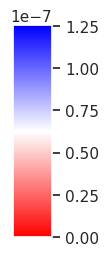

In [72]:
fig, ax = plt.subplots(figsize=(0.5, 2.75))

cmap = mpl.cm.bwr_r
norm = mpl.colors.Normalize(vmin=df.p_corr.min(), vmax=df.p_corr.max())

mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr_r)

cbl = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation="vertical")

/tmp/ipykernel_2906809/2106751881.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([textwrap.fill(e, 30) for e in df['term']])


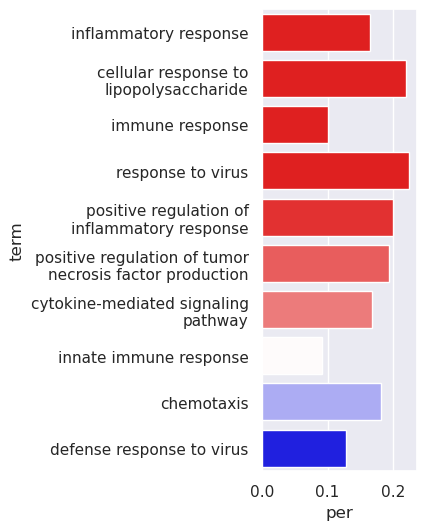

In [73]:
plt.figure(figsize=(2, 6))

ax = sns.barplot(
    data=df, x="per", y="term", palette=list(mapper.to_rgba(df.p_corr.values))
)

ax.set_yticklabels([textwrap.fill(e, 30) for e in df["term"]])

plt.savefig(
    "/home/t.afanasyeva/MATseq/notebooks/DeSeq2/LPSvsIMDM results/go.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
)
plt.show()

Volcano plot

In [74]:
df = res.copy()

In [75]:
overexpressed = list(res[(res["log2FoldChange"] > 1) & (res["padj"] < 0.05)].index)

In [76]:
underexpressed = list(res[(res["log2FoldChange"] < -1) & (res["padj"] < 0.05)].index)

In [77]:
immunoresponse_genes = list(immunoresponse_genes)

In [78]:
df = df.reset_index(names="gene")

In [79]:
def map_color(args):
    gene, log2FoldChange = args

    if abs(log2FoldChange) < 2:
        return "no_expression_change"
    if gene in overexpressed:
        return "overexpressed"
    if gene in underexpressed:
        return "underexpressed"

In [80]:
df["color"] = df[["gene", "log2FoldChange"]].apply(map_color, axis=1)

In [81]:
def map_shape(gene):
    if gene in immunoresponse_genes:
        return "immunoresponse-related"
    return "not_immunoresponse"


df["shape"] = df.gene.map(map_shape)

In [82]:
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,color,shape
0,KLHL8,124.02246,0.25496,0.06968,3.65914,2.53064e-04,2.19114e-03,no_expression_change,not_immunoresponse
1,ZNF576,53.75334,-0.10847,0.09384,-1.15590,2.47720e-01,5.04634e-01,no_expression_change,not_immunoresponse
2,FCF1,290.85518,0.03675,0.07092,0.51812,6.04373e-01,8.09575e-01,no_expression_change,not_immunoresponse
3,TAF12,95.44678,-0.01778,0.08368,-0.21250,8.31717e-01,9.30981e-01,no_expression_change,not_immunoresponse
4,GLRX,97.98360,0.53792,0.08607,6.24972,4.11193e-10,8.73950e-09,no_expression_change,not_immunoresponse


In [83]:
from adjustText import adjust_text

In [84]:
df["padj"] = -np.log10(df["padj"])

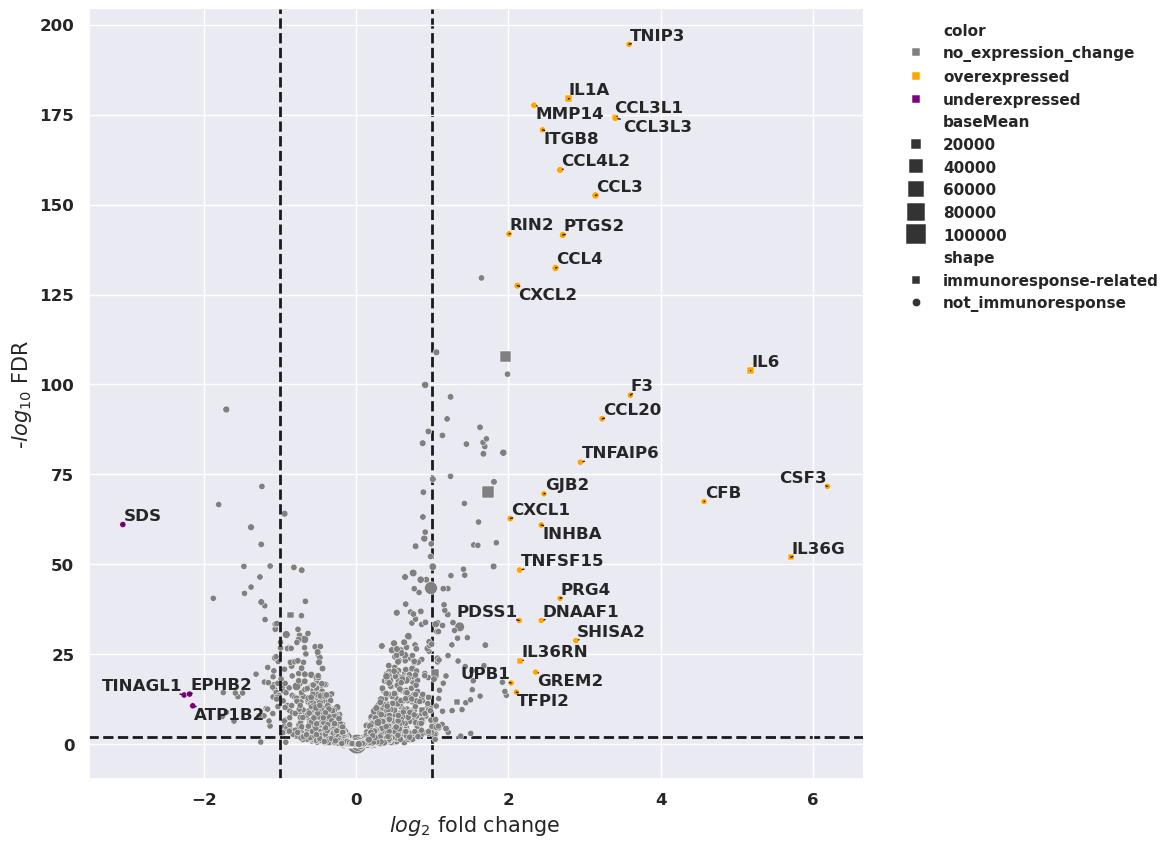

In [85]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(
    data=df,
    x="log2FoldChange",
    y="padj",
    hue="color",
    hue_order=["no_expression_change", "overexpressed", "underexpressed"],
    palette=["grey", "orange", "purple"],
    style="shape",
    style_order=["immunoresponse-related", "not_immunoresponse"],
    markers=["s", "o"],
    size="baseMean",
    sizes=(20, 200),
)

ax.axhline(2, zorder=0, c="k", lw=2, ls="--")
ax.axvline(1, zorder=0, c="k", lw=2, ls="--")
ax.axvline(-1, zorder=1, c="k", lw=2, ls="--")


texts = []
for i in range(len(df)):
    if df.iloc[i].padj > 5 and abs(df.iloc[i].log2FoldChange) > 2:
        texts.append(
            plt.text(
                x=df.iloc[i].log2FoldChange,
                y=df.iloc[i].padj,
                s=df.iloc[i].gene,
                fontsize=12,
                weight="bold",
            )
        )

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="k"))

plt.legend(loc=1, bbox_to_anchor=(1.4, 1), frameon=False, prop={"weight": "bold"})

for axis in ["bottom", "left"]:
    ax.spines[axis].set_linewidth(2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(width=2)

plt.xticks(size=12, weight="bold")
plt.yticks(size=12, weight="bold")

plt.xlabel("$log_{2}$ fold change", size=15)
plt.ylabel("-$log_{10}$ FDR", size=15)

plt.savefig(
    "/home/t.afanasyeva/MATseq/notebooks/DeSeq2/LPSvsIMDM results/volcano.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
)

plt.show()